In [1]:
# standard libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
import warnings
warnings.filterwarnings('ignore')

# our libraries
home_path = '/home/nahuel.statuto/p-values'
sys.path.insert(0, home_path)

import sfit as s_fit
import functions as fn

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
importlib.reload(fn)
importlib.reload(s_fit)

<module 'sfit' from '/home/nahuel.statuto/p-values/sfit.py'>

In [3]:
def one_dim(x,dim,pos):
    for i in range(dim):
        if i!=(pos+1):
            x[:,i]=0
    return x
    

coef = [0.15,0.01,0.1,0.1]
expp = 2.5
noise_mean = 0.0
noise_var = 0.01
noise = 0.001
    
def model(X):
    return 3+4*X[0]+X[0]*X[1]+3*np.power(X[2],2)+np.exp(0.5*abs(X[3]))+2*X[3]*X[4]+ np.random.normal(noise_mean,noise_var)
    #return coef[0]*abs(X[0]) + coef[1]*np.exp(expp*abs(X[1])) + coef[2]*np.power(abs(X[2]+abs(X[3])+noise),coef[3]) + np.random.normal(noise_mean,noise_var)

def model_logX(X):
    return coef[0]*abs(X[0]) + coef[1]*np.power(abs(X[1]),expp) + coef[2]*np.power(abs(X[2]+abs(X[3])+noise),coef[3]) + np.random.normal(noise_mean,noise_var)

def toy_model(X,model,pos=None):
    ''' 
    funtion that returns a list with the y values using the input "X" and the function "model". 
    
    X: list of vectors. [ [],...,[] ].
    model: function te be evaluated .
    pos: integer value lower or equal to lengh of the X vectors. If pos=i, then y=[0,...,y_i,...,0] will be all 
        zeros except for the "i" position.
    '''
    x = X.copy()
    N,dim = np.shape(x)
    y = np.asarray([])
    
    if pos is not None:
        x = np.delete(one_dim(x,dim,pos),0,1)
        dim -= 1
    
    for i in range(N):
        aux = model([x[i]+np.random.uniform(0,noise_var,(1,dim))][0][0])
        y = np.concatenate((y, aux ), axis=None)
        
    if pos is None:
        return (y-np.mean(y))/(np.var(y))
    return y

In [4]:
dim = 7
N = 1000
X = np.random.normal(0,1,(N,dim))

y = toy_model(X,model)
#y2 = toy_model(X,model_logX)

In [6]:
variable_names = ['x'+str(j) for j in range(dim)]
X = sm.add_constant(X)
xname = variable_names
xname.insert(0,'const')

max_cores = 90
test_size = 0.25
k_folds = 10
n_runs = int(max_cores/k_folds)*k_folds
layers=[[150,50]]

In [7]:
optimal_betas = fn.beta_tester(X, y, k_folds, n_runs=n_runs, layers=layers)

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required f

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required f

2023-10-17 17:09:03.612849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:03.624041: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 104. Tune using inter_op_parallelism_threads for best performance.
2023-10-17 17:09:03.658801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:03.666687: I tenso

2023-10-17 17:09:04.470561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.475589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.476406: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 104. Tune using inter_op_parallelism_threads for best performance.
2023-10-17 17:09:04.477892: I tenso

2023-10-17 17:09:04.711469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.720741: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 104. Tune using inter_op_parallelism_threads for best performance.
2023-10-17 17:09:04.724674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.731245: I tenso

2023-10-17 17:09:04.920255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.925668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 17:09:04.927319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: 

In [8]:
optimal_betas

{0.0029192926025390638: 1,
 0.004378938903808595: 1,
 0.006568408355712893: 3,
 0.009852612533569338: 11,
 0.014778918800354007: 29,
 0.02216837820053101: 37,
 0.033252567300796516: 8}

(array([ 2.,  3., 11., 29.,  0.,  0., 37.,  0.,  0.,  8.]),
 array([0.00291929, 0.00595262, 0.00898595, 0.01201928, 0.0150526 ,
        0.01808593, 0.02111926, 0.02415258, 0.02718591, 0.03021924,
        0.03325257]),
 <BarContainer object of 10 artists>)

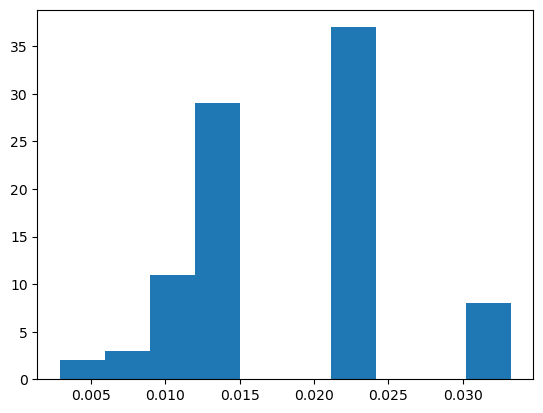

In [9]:
mylist = [key for key, val in optimal_betas.items() for _ in range(val)]
plt.hist(mylist)

In [10]:
from scipy.stats import norm
datos = mylist.copy()

# best fit of data
(mu, sigma) = norm.fit(datos)

print(r'$\mu$ = {}, $\sigma$ = {}'.format(mu,sigma))

$\mu$ = 0.018335793016433725, $\sigma$ = 0.006936166809786835


In [11]:
# Train models
second_order_bool = True
factor = 1
steps = 5
#beta_vec = np.arange(min(optimal_betas)*0.9,max(optimal_betas)*1.1, (max(optimal_betas)-min(optimal_betas))/20)
beta_vec = np.arange(mu-factor*sigma,mu+factor*sigma, factor/steps*sigma)
res, data = fn.different_models(X, y, k_folds, n_runs=n_runs, layers=layers, beta_vec=beta_vec, variable_names=variable_names, second_order_bool=second_order_bool)

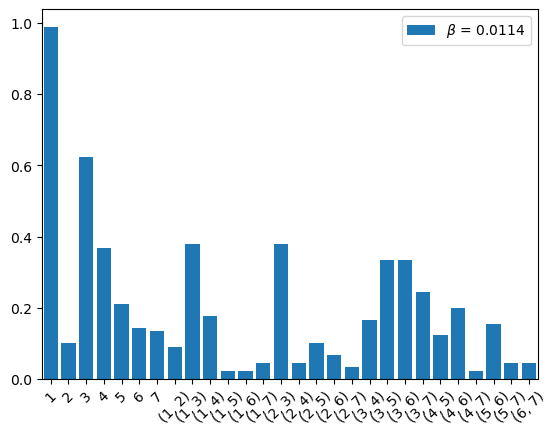

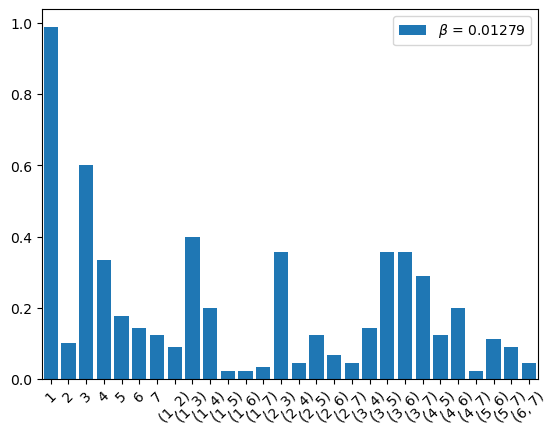

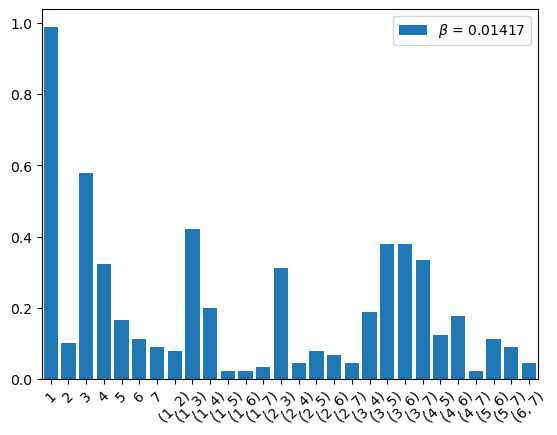

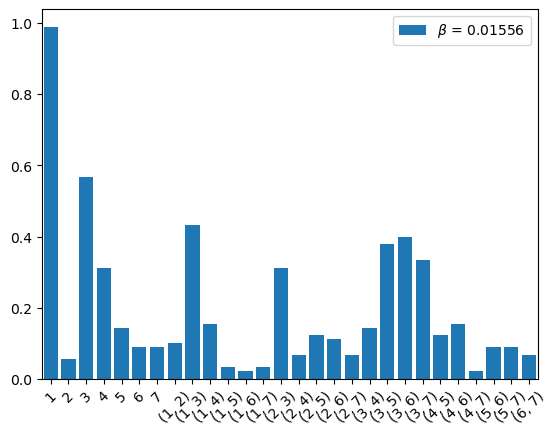

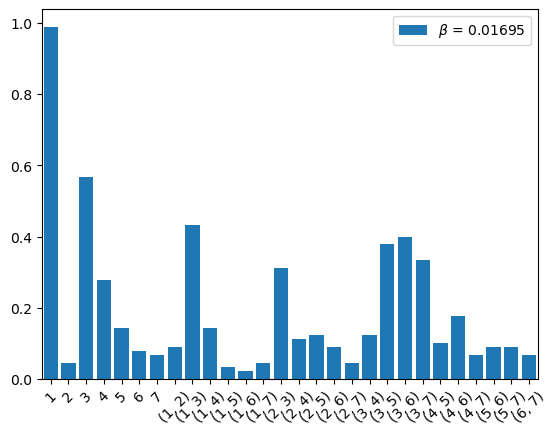

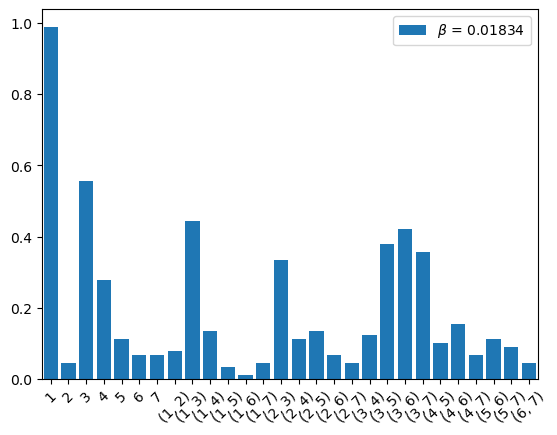

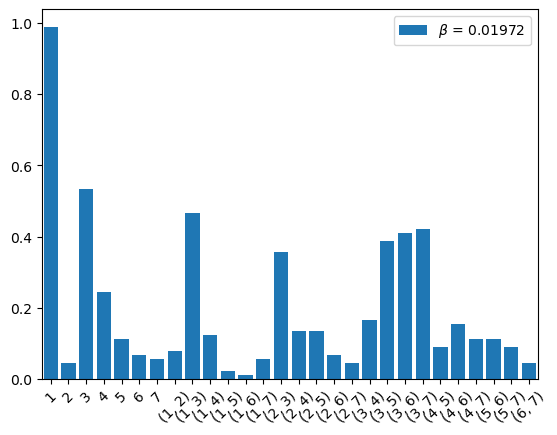

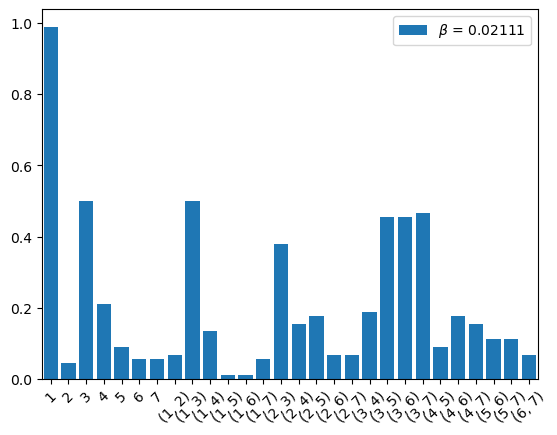

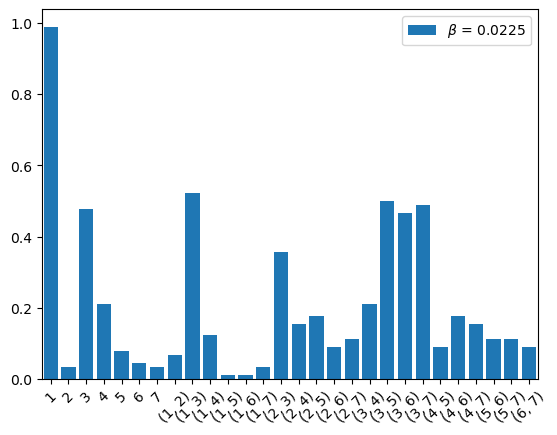

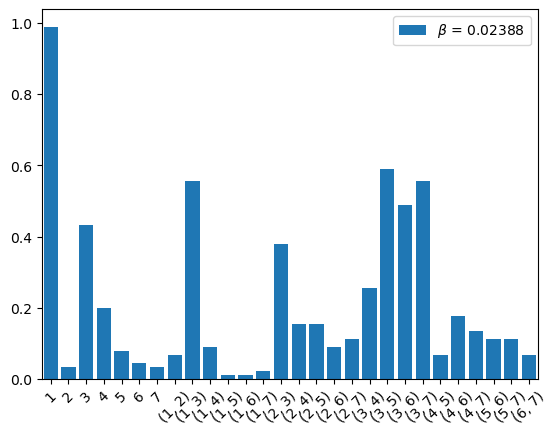

In [12]:
a,b = fn.histogram_data(data=data, beta_vec=beta_vec, norm=n_runs)

for key in a:
    if key>0:
        histo_dic = fn.Merge(a[key],b[key])
        fn.plot_histogram(histo_dic,variable_names=variable_names, label = r'$\beta$ = '+str(round(key,5)))


In [13]:
## OLS summary
print('base_loss_linear: {}'.format(res[0][3]))
print(res[0][0].summary(xname=xname))

## NN histograms
for result in res[1:]:
    print('base_loss: {}'.format(result[1]))
    print('r2: {}'.format(round(result[0],3)))
    #fn.plot_heat_map(result[0], result[1], beta_vec=beta_vec)

base_loss_linear: 0.016288885069705723
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     88.64
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          3.44e-100
Time:                        17:18:02   Log-Likelihood:                 639.70
No. Observations:                1000   AIC:                            -1263.
Df Residuals:                     992   BIC:                            -1224.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

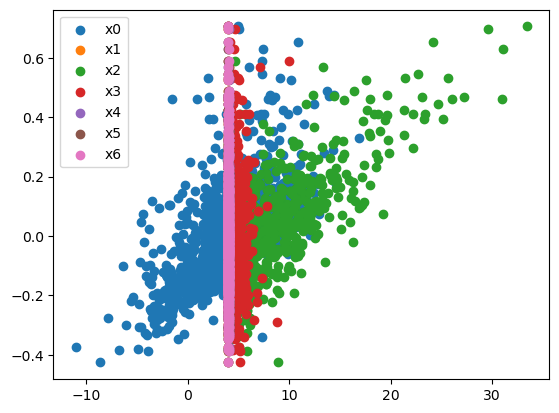

In [14]:
plt.figure()
for i in range(dim):
    plt.scatter(toy_model(X,model,pos=i),y,label=variable_names[i+1])
plt.legend()

# Testing $\frac{\beta}{10}$ for highlight second order relation

In [14]:
# 
second_order_bool = True

mu_ = mu/10
sigma_ = sigma/np.sqrt(10)

beta_vec = beta_vec = np.arange(mu_-factor*sigma_,mu_+factor*sigma_, factor/steps*sigma_)
res1, data1 = fn.different_models(X, y, k_folds, n_runs=n_runs, layers=layers, beta_vec=beta_vec, variable_names=variable_names, second_order_bool=second_order_bool)

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-10-11 17:23:42.739948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 17:23:42.765886: I tensorflow/core/common_runti

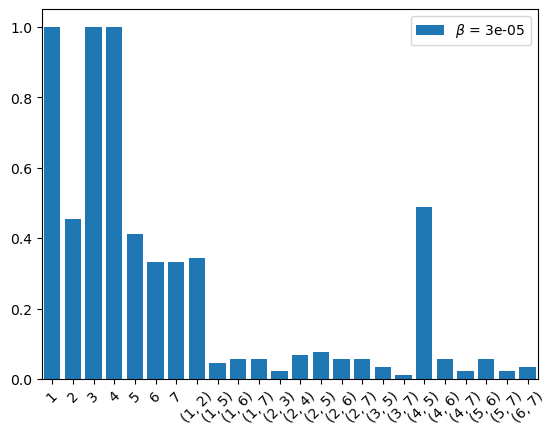

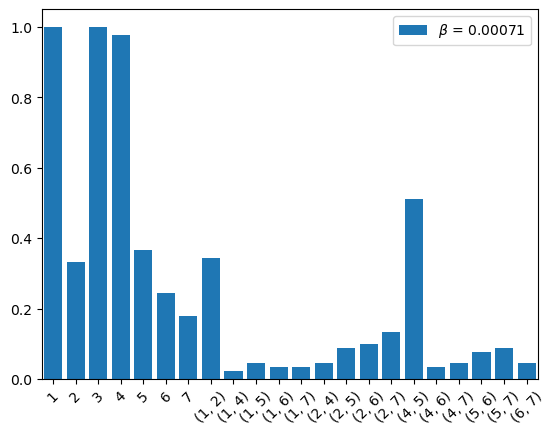

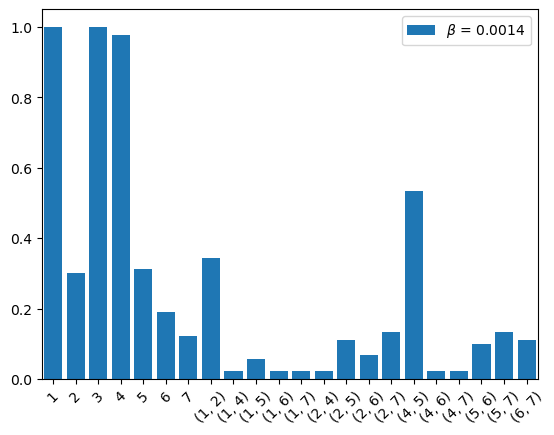

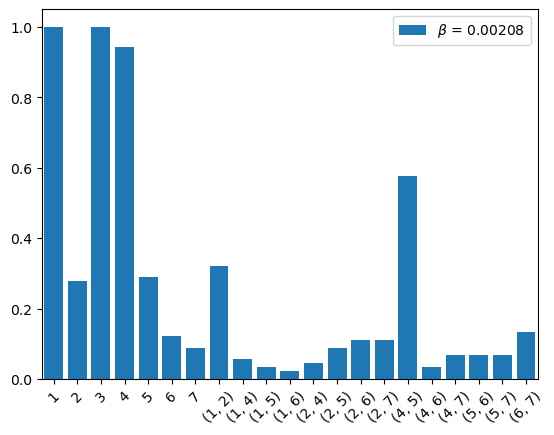

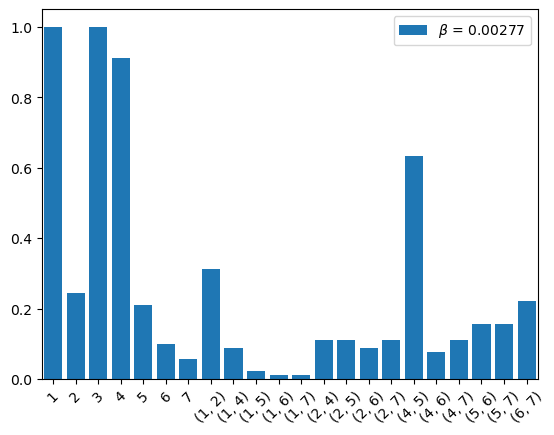

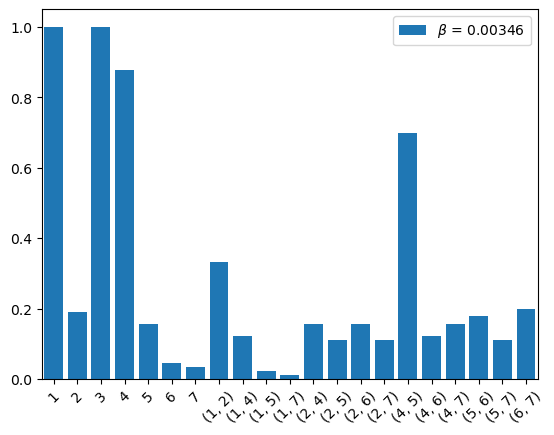

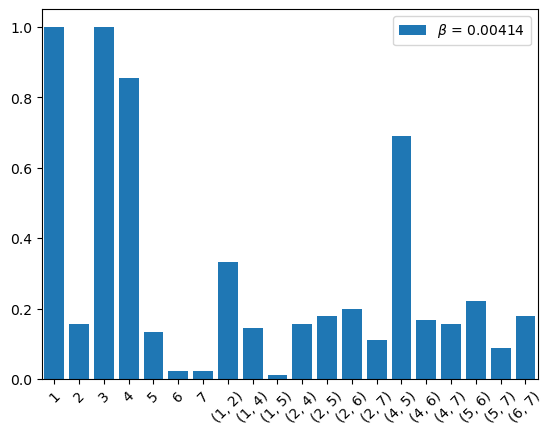

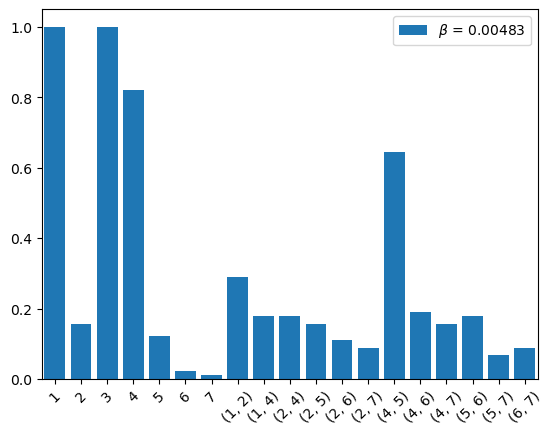

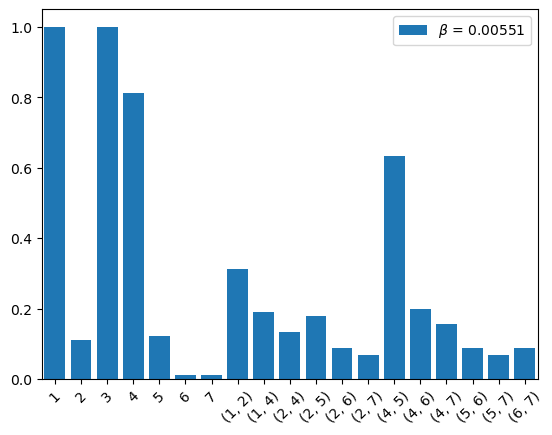

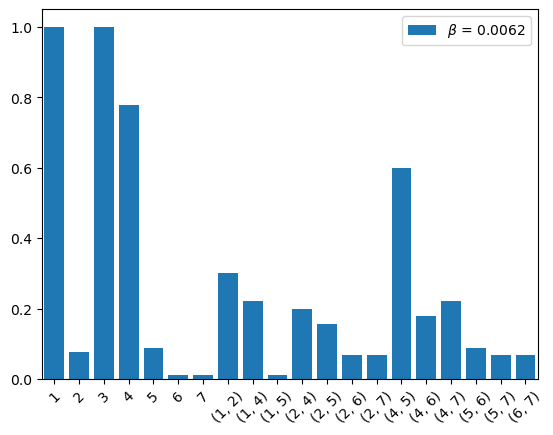

In [15]:
a,b = fn.histogram_data(data=data1, beta_vec=beta_vec, norm=n_runs)

for key in a:
    if key>0:
        histo_dic = fn.Merge(a[key],b[key])
        fn.plot_histogram(histo_dic,variable_names=variable_names, label = r'$\beta$ = '+str(round(key,5)))


In [22]:
histo_dic = fn.Merge(a[key],b[key])
print(histo_dic)
a,b = fn.histogram_data(data=data, beta_vec=beta_vec, norm=n_runs)

for key in a:
    if key>0:
        histo_dic = fn.Merge(a[key],b[key])
        
        fn.plot_histogram(a,variable_names=variable_names, label = r'$\beta$ = '+str(round(key,5)))

{1: 1.0, 2: 0.07777777777777778, 3: 1.0, 4: 0.7777777777777778, 5: 0.08888888888888889, 6: 0.011111111111111112, 7: 0.011111111111111112, (1, 2): 0.3, (1, 4): 0.2222222222222222, (1, 5): 0.011111111111111112, (2, 4): 0.2, (2, 5): 0.15555555555555556, (2, 6): 0.06666666666666667, (2, 7): 0.06666666666666667, (4, 5): 0.6, (4, 6): 0.17777777777777778, (4, 7): 0.2222222222222222, (5, 6): 0.08888888888888889, (5, 7): 0.06666666666666667, (6, 7): 0.06666666666666667}


KeyError: 2.6760691281733483e-05